In [226]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

def millions_formatter(x, pos):
    return '{:.0f}M'.format(x/1000000)



all1 = pd.read_csv('All_player_with_score.csv')
target = pd.read_csv('sina_saberi.csv')

all1

,Unnamed: 0,Unnamed: 0.1,season_id,player_id,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,...,date_of_birth,height,foot,position,mk_value,agent,apprance,score,goals_conceded,clean_sheets
0,0,0.0,2021,35207,25.714286,76.190476,70.0,36.666667,12.5,0.0,...,31-May-89,1.80,right,Attacking Midfield,35000000.0,Dirk Hebel,100.000000,100.000000,NaN,NaN
1,1,1.0,2021,35207,25.714286,76.190476,70.0,36.666667,12.5,0.0,...,31-May-89,1.80,right,Attacking Midfield,45000000.0,Dirk Hebel,100.000000,100.000000,NaN,NaN
2,2,2.0,2021,35207,25.714286,76.190476,70.0,36.666667,12.5,0.0,...,31-May-89,1.80,right,Attacking Midfield,35000000.0,Dirk Hebel,100.000000,100.000000,NaN,NaN
3,3,3.0,2021,35207,25.714286,76.190476,70.0,36.666667,12.5,0.0,...,31-May-89,1.80,right,Attacking Midfield,11000000.0,Dirk Hebel,100.000000,100.000000,NaN,NaN
4,4,4.0,2021,35207,25.714286,76.190476,70.0,36.666667,12.5,0.0,...,31-May-89,1.80,right,Attacking Midfield,50000000.0,Dirk Hebel,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16134,16134,NaN,2021,118997,NaN,NaN,0.0,20.000000,0.0,100.0,...,3-May-91,1.82,right,Goalkeeper,6000000.0,Sports and ...,37.142857,1.273945,37.179487,9.090909
16135,16135,NaN,2021,438682,NaN,NaN,0.0,0.000000,0.0,100.0,...,4-Jul-97,1.90,right,Goalkeeper,100000.0,SportsMaxi ...,0.000000,0.000000,0.000000,0.000000
16136,16136,NaN,2021,438682,NaN,NaN,0.0,0.000000,0.0,100.0,...,4-Jul-97,1.90,right,Goalkeeper,400000.0,SportsMaxi ...,0.000000,0.000000,0.000000,0.000000
16137,16137,NaN,2021,438682,NaN,NaN,0.0,0.000000,0.0,100.0,...,4-Jul-97,1.90,right,Goalkeeper,800000.0,SportsMaxi ...,0.000000,0.000000,0.000000,0.000000


In [227]:
df1_total = all1.groupby('position').mean()['mk_value']
df1_total

position
Attacking Midfield    1.509754e+07
Central Midfield      1.273412e+07
Centre-Back           1.043019e+07
Centre-Forward        1.384337e+07
Defensive Midfield    1.143082e+07
Goalkeeper            6.253720e+06
Left Midfield         8.860833e+06
Left Winger           1.655379e+07
Left-Back             9.340940e+06
Right Midfield        7.653654e+06
Right Winger          1.415080e+07
Right-Back            8.721394e+06
Second Striker        2.148251e+07
Name: mk_value, dtype: float64

In [228]:
df1_target = target.groupby('position').mean()['mk_value_x']
df1_target

position
Attacking Midfield    1.796429e+06
Central Midfield      1.772727e+06
Centre-Back           1.914286e+06
Centre-Forward        2.009375e+06
Defensive Midfield    1.918750e+06
Goalkeeper            3.333333e+05
Left Midfield         2.000000e+06
Left Winger           2.512500e+06
Left-Back             2.092105e+06
Right Midfield        1.075000e+06
Right Winger          3.500000e+06
Right-Back            2.354762e+06
Second Striker        3.500000e+06
Name: mk_value_x, dtype: float64

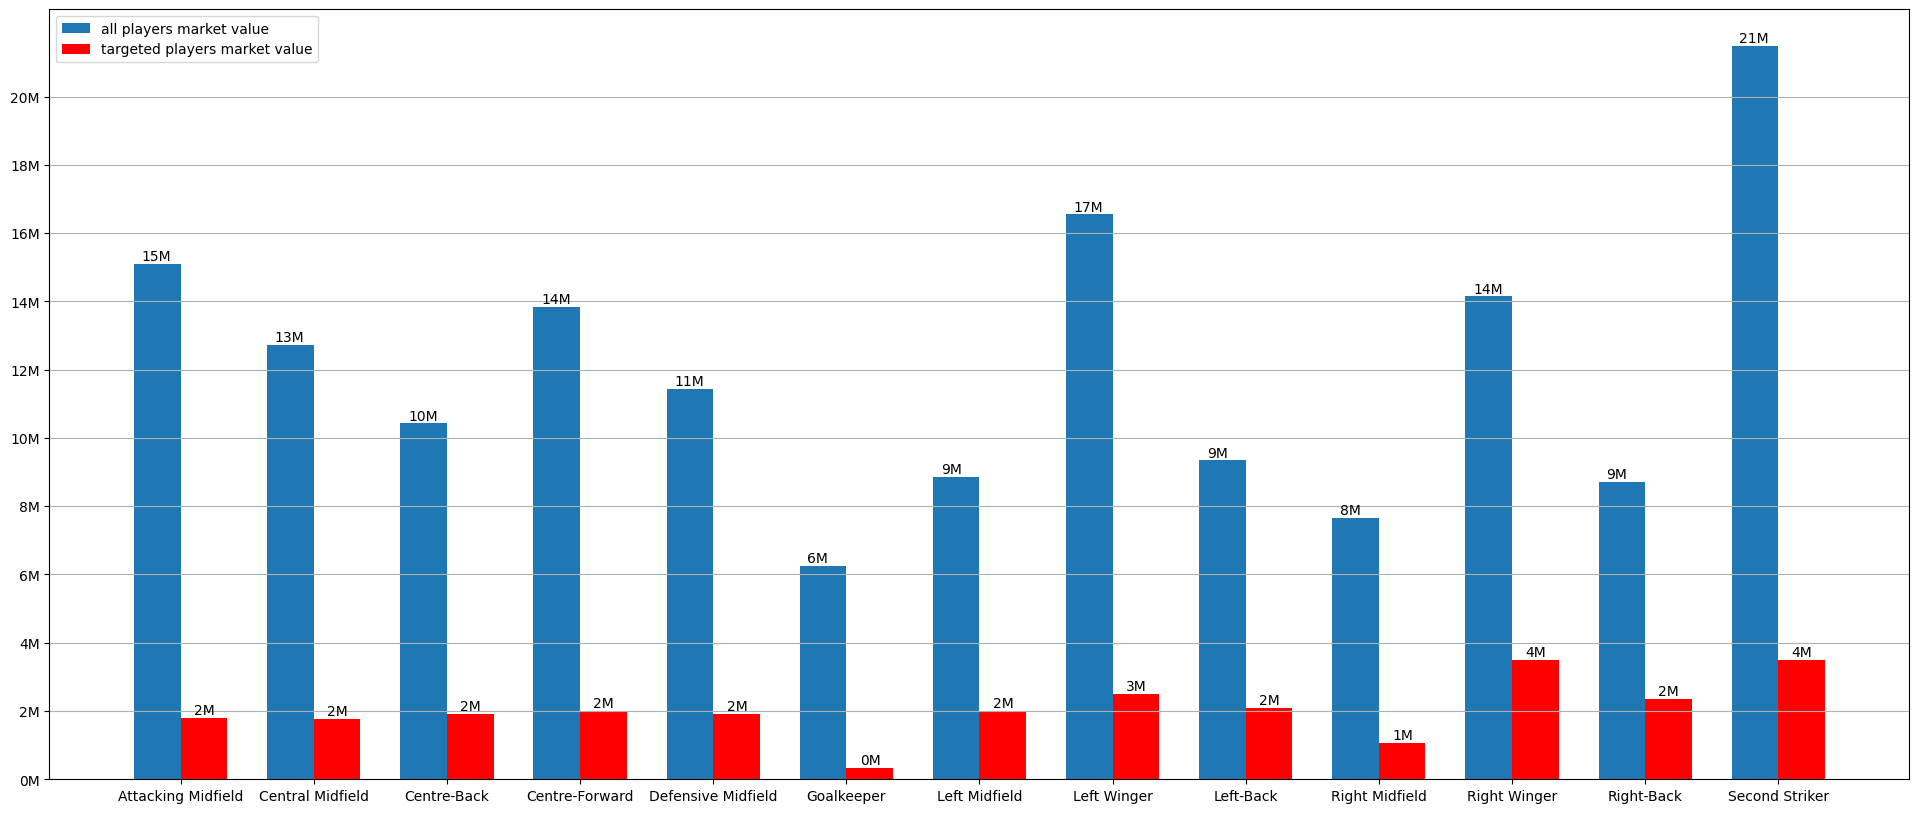

In [229]:
bar_width = 0.35
x_pos = np.arange(len(df1_total.index))

fig1, ax1 = plt.subplots(figsize=(24,10))

b1 = ax1.bar(x_pos - bar_width/2, df1_total.values, label='all players market value', width=bar_width)
b2 = ax1.bar(x_pos + bar_width/2, df1_target.values, label='targeted players market value', color= 'red', width=bar_width)

plt.xticks(x_pos,df1_total.index)
plt.yticks([0,2000000,4000000,6000000,8000000,10000000,12000000,14000000,16000000,18000000,20000000])
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
for i in range(len(df1_total.index)):
    ax1.text(x_pos[i] - bar_width/1.2, df1_total.values[i]+100000, millions_formatter(df1_total.values[i], x_pos[i]), color= 'black')
    ax1.text(x_pos[i] + 0.1, df1_target.values[i]+100000, millions_formatter(df1_target.values[i], x_pos[i]), color= 'black')
plt.grid(axis='y')
plt.legend() 
plt.show()


In [230]:
df2_total = all1.groupby('position').mean()['score']
df2_target = target.groupby('position').mean()['score']
df2_target

position
Attacking Midfield    16.972751
Central Midfield      19.212630
Centre-Back           29.216782
Centre-Forward        43.412250
Defensive Midfield    32.716859
Goalkeeper            36.817669
Left Midfield         10.820318
Left Winger           23.973314
Left-Back             25.301394
Right Midfield        12.889160
Right Winger          25.537231
Right-Back            37.061551
Second Striker        26.284719
Name: score, dtype: float64

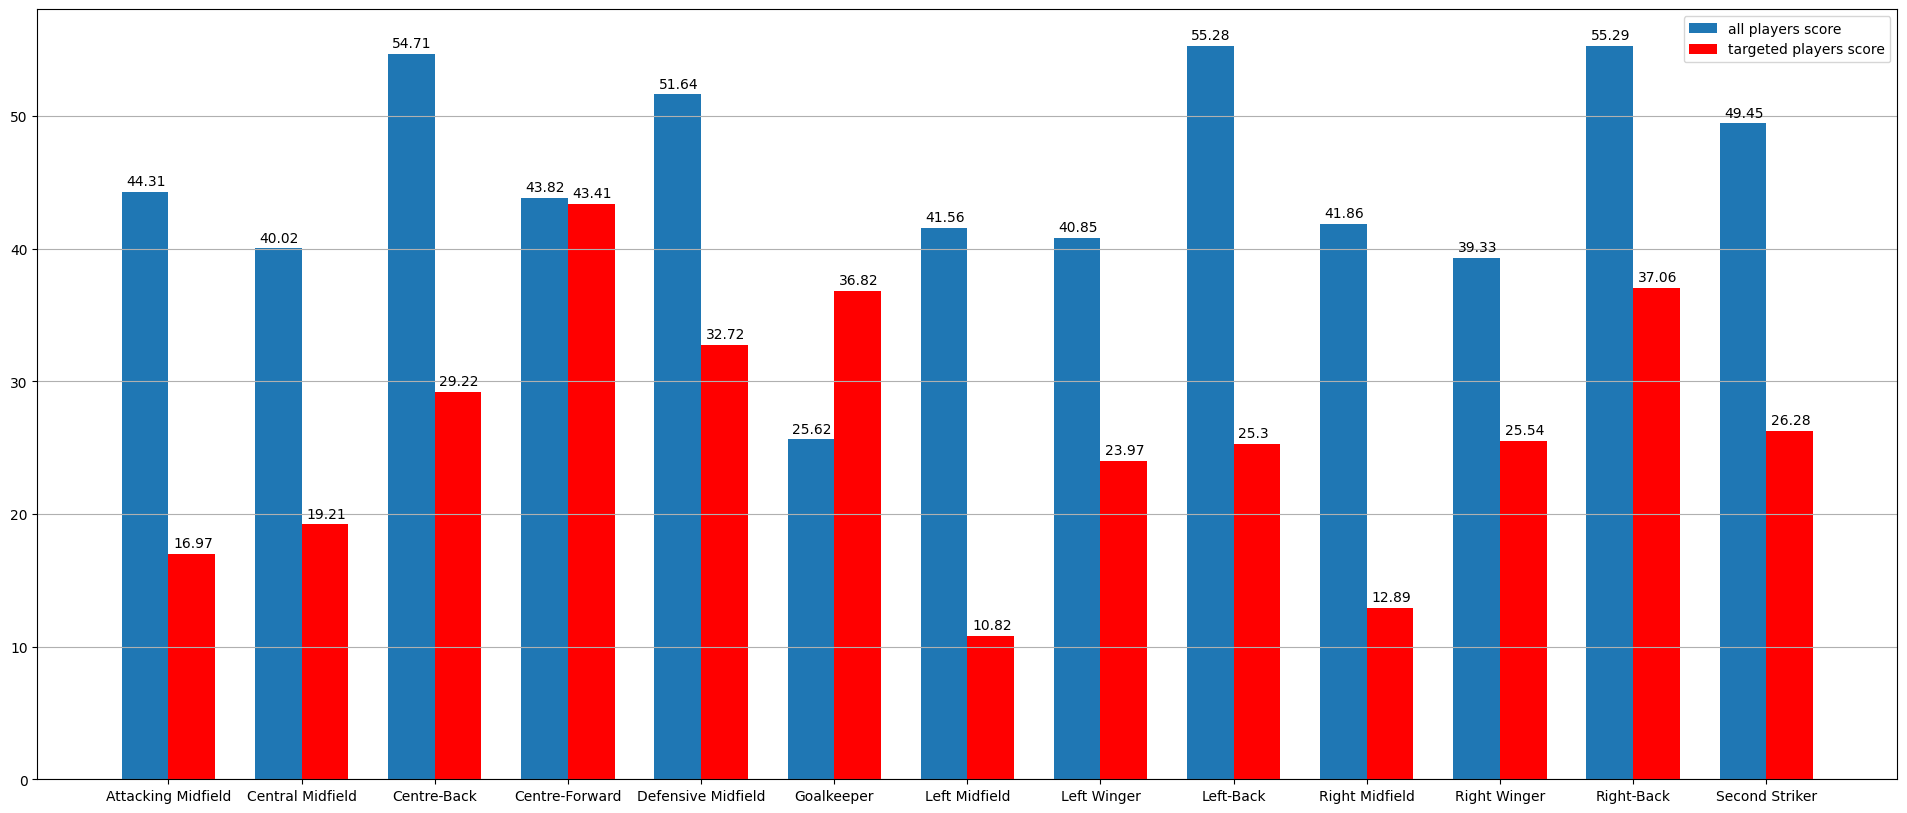

In [231]:
bar_width = 0.35
x_pos = np.arange(len(df2_total.index))

fig1, ax1 = plt.subplots(figsize=(24,10))

b3 = ax1.bar(x_pos - bar_width/2, df2_total.values, label='all players score', width=bar_width)
b4 = ax1.bar(x_pos + bar_width/2, df2_target.values, label='targeted players score', color= 'red', width=bar_width)

plt.xticks(x_pos,df2_total.index)
for i in range(len(df1_total.index)):
    ax1.text(x_pos[i] - bar_width/1.1, df2_total.values[i] + 0.5, round(df2_total.values[i],2), color= 'black')
    ax1.text(x_pos[i] + bar_width/10, df2_target.values[i] + 0.5, round(df2_target.values[i],2), color= 'black')
plt.grid(axis='y')
plt.legend() 
plt.show()

In [232]:
counts_all = all1['position'].value_counts() / len(all1) * 100
counts_target = target['position'].value_counts() / len(target) * 100

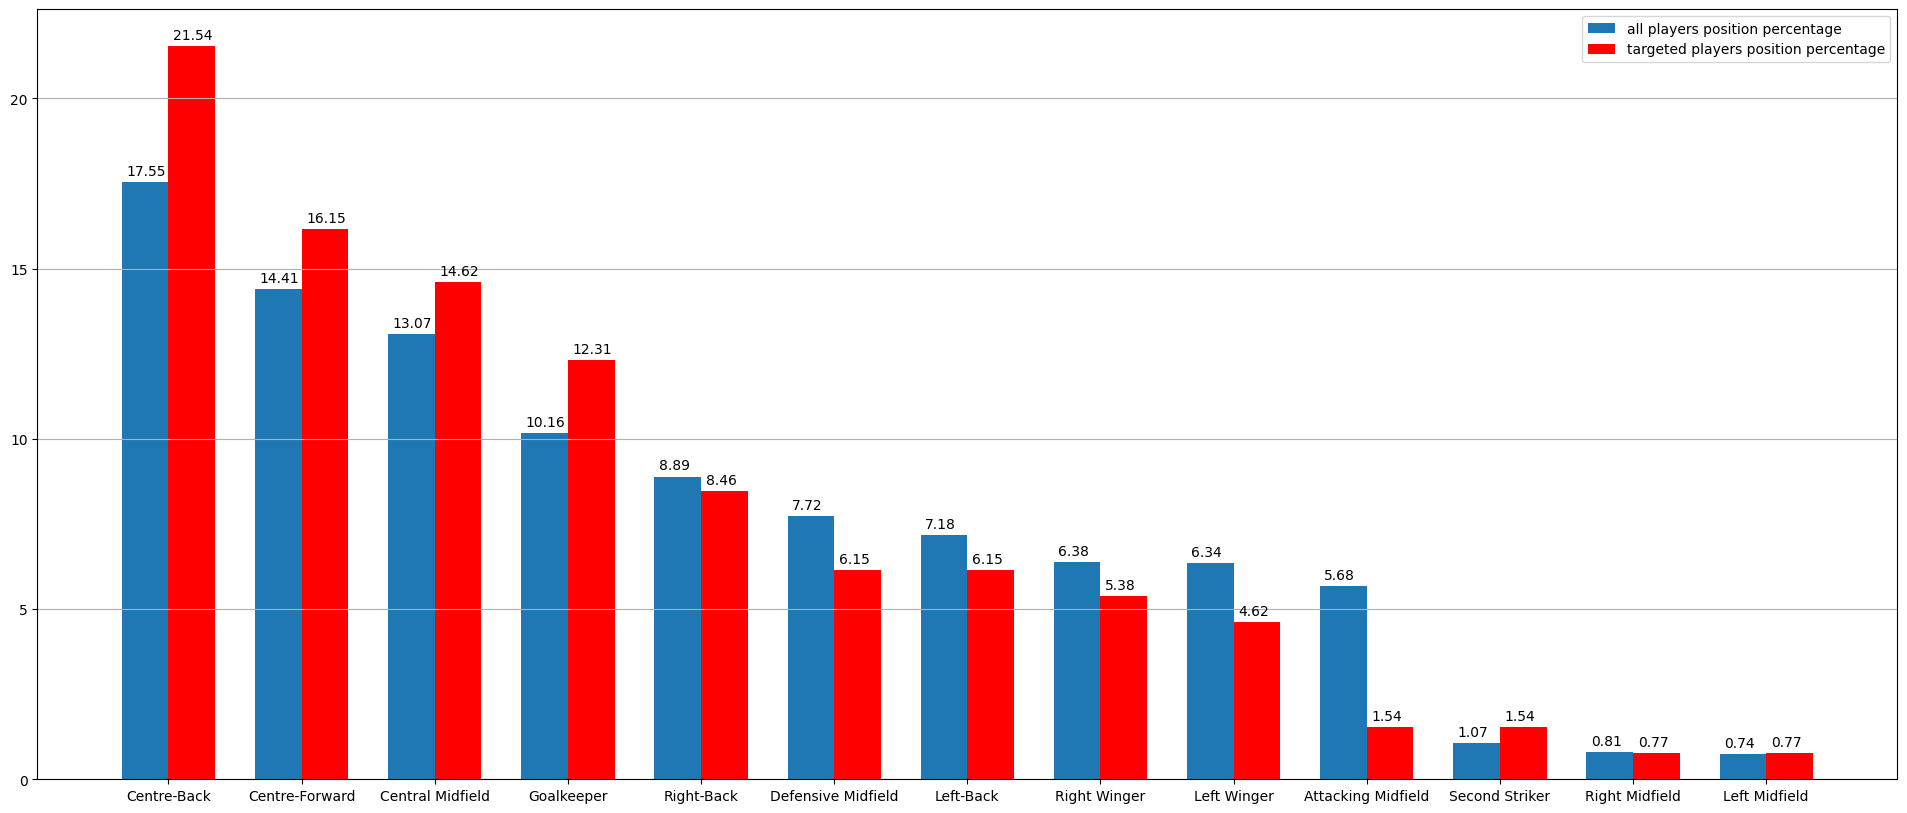

In [233]:
bar_width = 0.35
x_pos = np.arange(len(counts_all.index))

fig1, ax1 = plt.subplots(figsize=(24,10))

b3 = ax1.bar(x_pos - bar_width/2, counts_all.values, label='all players position percentage', width=bar_width)
b4 = ax1.bar(x_pos + bar_width/2, counts_target.values, label='targeted players position percentage', color= 'red', width=bar_width)

plt.xticks(x_pos,counts_all.index)
for i in range(len(df1_total.index)):
    ax1.text(x_pos[i] - bar_width/1.1, counts_all.values[i] + 0.2, round(counts_all.values[i],2), color= 'black')
    ax1.text(x_pos[i] + bar_width/10, counts_target.values[i] + 0.2, round(counts_target.values[i],2), color= 'black')
plt.grid(axis='y')
plt.legend() 
plt.show()